## Extract the amount of patches in each slide

In [1]:
import os
import pandas as pd
import h5py
from tqdm.notebook import tqdm

In [76]:
root_dir = "/media/visiopharm5/WDGold/deeplearning/MIL/CLAM/results"
with_anno = False
series = 'tcga' # tcga, mondor

In [77]:
if series == 'tcga':
    if with_anno:
        path_patch = os.path.join(root_dir, "patches_tumor")
        output = "npatches_tumor.csv"
        output1 = "npatches_tumor_349.csv"
    else:
        path_patch = os.path.join(root_dir, "patches")
        output = "npatches.csv"
        output1 = "npatches_349.csv"
elif series == 'mondor':
    if with_anno:
        path_patch = '/media/visiopharm5/WDRed(backup)/clam_extension/results/patches_mondor_tumor'
        output = "npatches_mondor_tumor.csv"
        output1 = "npatches_mondor_tumor_139.csv"
#     else:
#         path_patch = os.path.join(root_dir, "patches")
#         output = "npatches.csv"

In [78]:
for root, dirs, files in os.walk(path_patch):
    df = pd.DataFrame(files,columns=["slide_id"])
print(df.shape)
display(df.head(5))

(354, 1)


,slide_id
0,TCGA-2V-A95S-01Z-00-DX1.9DFA6FC7-87A6-4C14-9A3...
1,TCGA-2Y-A9GS-01Z-00-DX1.75C5CEF1-6C8B-42FF-82F...
2,TCGA-2Y-A9GT-01Z-00-DX1.30666775-3556-4DFE-A5E...
3,TCGA-2Y-A9GU-01Z-00-DX1.700CBBD7-9F58-470D-A85...
4,TCGA-2Y-A9GV-01Z-00-DX1.524FA6DD-7C84-425C-A2B...


### Iterate the patch file (h5) and read the patch number

In [79]:
list_amount = []
for i in tqdm(range(df.shape[0])): # for each slide / bag
    with h5py.File(os.path.join(path_patch, df.iloc[i, 0]), "r") as f: # create a h5 file for each bag
        list_amount.append(f["coords"].shape[0])
df["n_patches"] = list_amount

print(df.shape)
display(df.head(5))


(354, 2)


,slide_id,n_patches
0,TCGA-2V-A95S-01Z-00-DX1.9DFA6FC7-87A6-4C14-9A3...,1481
1,TCGA-2Y-A9GS-01Z-00-DX1.75C5CEF1-6C8B-42FF-82F...,10505
2,TCGA-2Y-A9GT-01Z-00-DX1.30666775-3556-4DFE-A5E...,8896
3,TCGA-2Y-A9GU-01Z-00-DX1.700CBBD7-9F58-470D-A85...,10135
4,TCGA-2Y-A9GV-01Z-00-DX1.524FA6DD-7C84-425C-A2B...,12966


In [80]:
print("max: " + str(max(df["n_patches"])))
print("min: " + str(min(df["n_patches"])))

max: 35364
min: 662


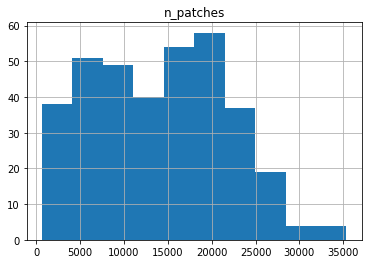

In [81]:
hist = df.hist(bins=10)

(349, 3)


,case_id,slide_id,cluster
0,TCGA-DD-AADN,TCGA-DD-AADN-01Z-00-DX1.0C031278-22F9-40DE-9CF...,Cluster High
1,TCGA-DD-AACC,TCGA-DD-AACC-01Z-00-DX1.5B3061BB-6716-4253-851...,Cluster High
2,TCGA-DD-AACB,TCGA-DD-AACB-01Z-00-DX1.D4A7846E-8B38-4FBA-BAB...,Cluster High


(349, 2)


,slide_id,n_patches
0,TCGA-2V-A95S-01Z-00-DX1.9DFA6FC7-87A6-4C14-9A3...,1481
1,TCGA-2Y-A9GS-01Z-00-DX1.75C5CEF1-6C8B-42FF-82F...,10505
2,TCGA-2Y-A9GT-01Z-00-DX1.30666775-3556-4DFE-A5E...,8896


max: 35364
min: 1481


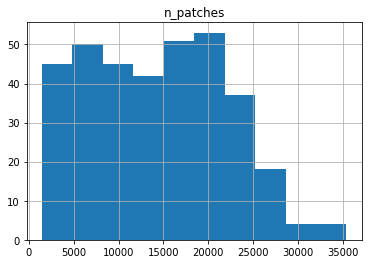

In [82]:
if series == 'tcga':
    df_ref = pd.read_csv('/media/visiopharm5/WDGold/deeplearning/MIL/CLAM/dataset_csv/tcga_hcc_349_6G_Interferon_Gamma_highvsrest.csv'
                        , index_col=0)
    print(df_ref.shape)
    display(df_ref.head(3))
    
    df_349 = df.copy(deep=True)
    for i in range(len(df_349)):
        if df_349.loc[i, 'slide_id'][:-3] not in list(df_ref['slide_id'].values):
            df_349.drop(i, inplace=True)
    print(df_349.shape)
    display(df_349.head(3))
    
    print("max: " + str(max(df_349["n_patches"])))
    print("min: " + str(min(df_349["n_patches"])))
    
    hist1 = df_349.hist(bins=10)
elif series == 'mondor':
    df_ref = pd.read_csv('/media/visiopharm5/WDGold/deeplearning/MIL/CLAM/dataset_csv/mondor_hcc_139_6G_Interferon_Gamma_highvsrest.csv'
                        , index_col=0)
    print(df_ref.shape)
    display(df_ref.head(3))
    
    df_139 = df.copy(deep=True)
    for i in range(len(df_139)):
        if df_139.loc[i, 'slide_id'][:-3] not in list(df_ref['slide_id'].values):
            df_139.drop(i, inplace=True)
    print(df_139.shape)
    display(df_139.head(3))
    
    print("max: " + str(max(df_139["n_patches"])))
    print("min: " + str(min(df_139["n_patches"])))
    
    hist1 = df_139.hist(bins=10)

### Export

In [83]:
df.to_csv(os.path.join(root_dir, output), index=False)

In [84]:
if series == 'tcga':
    df_349.to_csv(os.path.join(root_dir, output1), index=False)
elif series == 'mondor':
    df_139.to_csv(os.path.join(root_dir, output1), index=False)

## Compare